In [5]:
!pip install torch

^C
  Using cached torch-2.3.1-cp311-cp311-win_amd64.whl.metadata (26 kB)
  Using cached filelock-3.15.4-py3-none-any.whl.metadata (2.9 kB)
  Using cached sympy-1.13.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached fsspec-2024.6.1-py3-none-any.whl.metadata (11 kB)
  Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.4 kB)
  Using cached intel_openmp-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.2 kB)
  Using cached tbb-2021.13.0-py3-none-win_amd64.whl.metadata (1.1 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached torch-2.3.1-cp311-cp311-win_amd64.whl (159.8 MB)
   ---------------------------------------- 0.0/228.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/228.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/228.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/228.5 MB 186.2 kB/s eta 0:20:28
   -------------------------

ERROR: Could not install packages due to an OSError: [WinError 32] Процесс не может получить доступ к файлу, так как этот файл занят другим процессом: 'C:\\Users\\georg\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\torch\\sparse\\semi_structured.py'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import os
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms

import pytorch_lightning as pl
from pytorch_lightning import Trainer

In [9]:
#Возьмем 11 эпох и случайные числа для результатов
EPOCHS = 11
torch.random.manual_seed(42)
pl.seed_everything(42)

Seed set to 42


42

In [10]:
#Конвейер преобразования для всех последующих картинок в тензор
transforms_set=transforms.Compose([transforms.ToTensor(),
                                   transforms.Normalize((0.1307,),
                                                       (0.3081,))])

In [12]:
#Загрузка дата сетов
train_data = MNIST(root="data",train=True,
                   download=True,transform=transforms_set)
test_data = MNIST(root="data",train=False,
                  download=True,transform=transforms_set)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



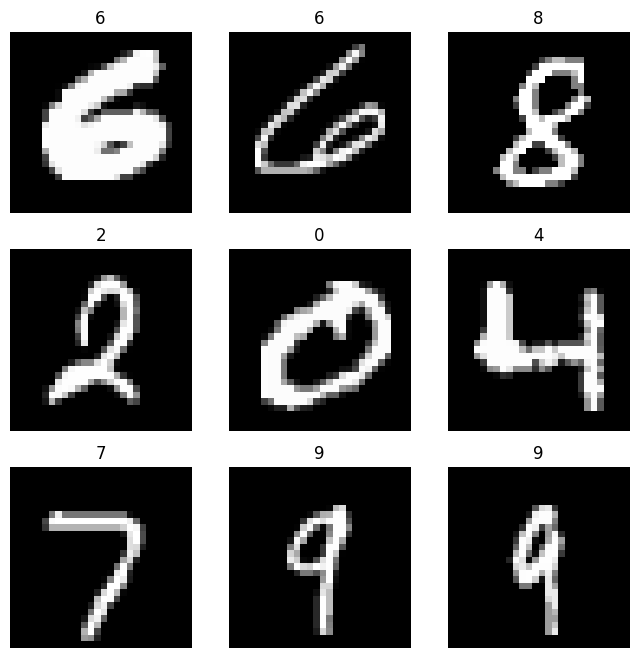

In [16]:
import matplotlib.pyplot as plt
labels_dict = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}

fig = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_index = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_index]
    fig.add_subplot(rows, cols, i)
    plt.title(labels_dict[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show() 

In [17]:
#Передача в загрузчик
train_data_loader = DataLoader(train_data, batch_size=16)
test_data_loader = DataLoader(test_data, batch_size=16)

In [23]:
class Pytorch_MNIST_Classifier(nn.Module):

  def __init__(self):
    super(Pytorch_MNIST_Classifier, self).__init__()

    self.layer_1 = torch.nn.Linear(28 * 28, 64)#Свертка
    self.layer_2 = torch.nn.Linear(64, 32)#Свертка
    self.layer_3 = torch.nn.Linear(32, 10)#Свертка
 
  def forward(self, x):
    batch_size, channels, width, height = x.size()
    x = x.view(batch_size, -1)
    x = self.layer_1(x)
    x = torch.relu(x)#Функцию активации на слой
    x = self.layer_2(x)
    x = torch.relu(x)#Функцию активации на слой
    x = self.layer_3(x)
    x = torch.log_softmax(x, dim=1)#Функцию активации на выходной слой
    return x

In [26]:
Pytorch_MNIST_model = Pytorch_MNIST_Classifier()#Присваиваем модель
optimizer = torch.optim.Adam(Pytorch_MNIST_model.parameters(), lr=1e-3)#Оптимизатор
loss_func = nn.CrossEntropyLoss()#Функция потерь

In [27]:
for epoch in range(EPOCHS):
  size = len(train_data_loader.dataset)
  for batch, (X, y) in enumerate(train_data_loader):

        pred = Pytorch_MNIST_model(X)
        loss = loss_func(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 1000 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

loss: 2.281074  [    0/60000]
loss: 0.273652  [16000/60000]
loss: 0.092656  [32000/60000]
loss: 0.343525  [48000/60000]
loss: 0.006415  [    0/60000]
loss: 0.060217  [16000/60000]
loss: 0.028049  [32000/60000]
loss: 0.400471  [48000/60000]
loss: 0.003583  [    0/60000]
loss: 0.043018  [16000/60000]
loss: 0.017352  [32000/60000]
loss: 0.303077  [48000/60000]
loss: 0.004018  [    0/60000]
loss: 0.019099  [16000/60000]
loss: 0.050539  [32000/60000]
loss: 0.204653  [48000/60000]
loss: 0.000604  [    0/60000]
loss: 0.011262  [16000/60000]
loss: 0.001909  [32000/60000]
loss: 0.199432  [48000/60000]
loss: 0.000082  [    0/60000]
loss: 0.005524  [16000/60000]
loss: 0.005726  [32000/60000]
loss: 0.060968  [48000/60000]
loss: 0.000304  [    0/60000]
loss: 0.007012  [16000/60000]
loss: 0.016938  [32000/60000]
loss: 0.010739  [48000/60000]
loss: 0.000070  [    0/60000]
loss: 0.004229  [16000/60000]
loss: 0.035860  [32000/60000]
loss: 0.116988  [48000/60000]
loss: 0.000074  [    0/60000]
loss: 0.00

In [30]:
size = len(test_data_loader.dataset)
batches = len(test_data_loader)
test_loss, correct = 0, 0
Pytorch_MNIST_model.eval()#Режим оценки
with torch.no_grad():
    for X, y in test_data_loader:
        # Нейросеть обрабатывает данные и возвращает предсказания
        pred = Pytorch_MNIST_model(X)
        test_loss += loss_func(pred, y).item()#Накапливаем корректные результаты
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
test_loss /= batches
correct /= size
print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%,Avg loss: {test_loss:>8f} \n")

Test Error: 
 Accuracy: 97.0%,Avg loss: 0.148569 



In [31]:
#Далее последует реализация той же модели, только с использованием PL

In [32]:
class Pytorch_Lightning_MNIST_Classifier(pl.LightningModule):
  
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(28 * 28 * 1, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 10)
    )#Сама архитектура с фун-ми активациями и слоями
    self.loss_func = nn.CrossEntropyLoss()#Функция потерь
    
  def forward(self, x):
    return self.layers(x)
  
  # Настраиваются параметры обучения
  def training_step(self, batch, batch_idx):
    x, y = batch
    x = x.view(x.size(0), -1)
    pred = self.layers(x)
    loss = self.loss_func(pred, y)
    self.log('train_loss', loss)
    return loss
  
  # Настраиваются параметры тестирования
  def test_step(self, batch, batch_idx):
    x, y = batch
    x = x.view(x.size(0), -1)
    pred = self.layers(x)
    loss = self.loss_func(pred, y)
    pred = torch.argmax(pred, dim=1)
    accuracy = torch.sum(y == pred).item() / (len(y) * 1.0)
    self.log('test_loss', loss, prog_bar=True)
    self.log('test_acc', torch.tensor(accuracy), prog_bar=True)
    output = dict({
        'test_loss': loss,
        'test_acc': torch.tensor(accuracy),
    })
    return output

  # Конфигурируется оптимизатор
  def configure_optimizers(self):
    optimizer = torch.optim.Adam(self.parameters(), lr=1e-4)
    return optimizer

In [ ]:
# Инициализация модели и функции Trainer(Сам чекает и подтягивает GPU или TPU при наличии
Pytorch_lightning_MNIST_model = Pytorch_Lightning_MNIST_Classifier()
trainer = pl.Trainer(max_epochs=EPOCHS)

# Обучение модели
trainer.fit(Pytorch_lightning_MNIST_model, DataLoader(train_data))

# Тестирование модели
trainer.test(Pytorch_lightning_MNIST_model, DataLoader(test_data))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
C:\Users\georg\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\logger_connector\logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
Missing logger folder: C:\Users\georg\lightning_logs

  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | layers    | Sequential       | 52.6 K | train
1 | loss_func | CrossEntropyLoss | 0      | train
-------------------------------------------------------
52.6 K    Traina

Epoch 1:  51%|█████████████████████████████                            | 30528/60000 [02:38<02:33, 192.38it/s, v_num=0]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Epoch 1:  73%|█████████████████████████████████████████▍               | 43617/60000 [03:53<01:27, 186.95it/s, v_num=0]